# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [3]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df_fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df_fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [7]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [8]:
df_fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
df_fraud.shape

(1000000, 8)

In [10]:
df_fraud["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [11]:
# 1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
# Yes, because 91.26 % of the values for the column "fraud" are False.

# 2. Train a LogisticRegression.
# For baseline, we will train a Logistic Regression in imbalanced data.

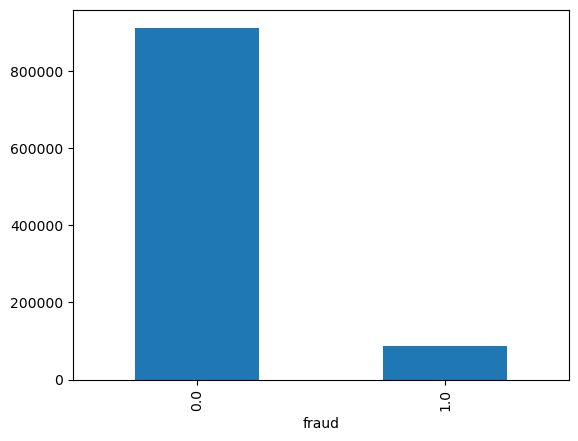

In [12]:
cl_fraud = df_fraud["fraud"].value_counts()
cl_fraud.plot(kind="bar")
plt.show()

In [13]:
features = df_fraud.drop(columns = ["fraud"])
target = df_fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
log_reg.score(X_test_scaled, y_test)

0.958404

In [18]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    227898
         1.0       0.89      0.60      0.72     22102

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [19]:
# 3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
# High Accuracy (95.91%) → The model correctly classifies most cases.
# Precision for Class 1 (Fraud): 89%. When the model predicts fraud, it is correct 89% of the time.
# Recall for Class 1 (Fraud): 60% The model misses 40% of actual fraud cases. Recall of fraud matters more than overall accuracy.

In [20]:
# 4. Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the model's performance?

In [21]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [22]:
train["fraud"] = y_train.values

In [23]:
# Add the target column "fraud" manually before resampling.

In [24]:
print(train.columns)  # Verify if "fraud" is present

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [25]:
train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train["fraud"] = y_train.values

In [26]:
print(train.columns)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [27]:
true = train[train["fraud"] == 1]
false = train[train["fraud"] == 0]

In [28]:
true_oversampled = resample(true, 
                                    replace=True, 
                                    n_samples = len(false),
                                    random_state=0)

In [29]:
train_over = pd.concat([true_oversampled, false])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31166,-0.276285,2.160149,1.653745,0.366315,1.362479,-0.334342,-1.364721,1.0
501005,-0.052851,2.479271,-0.301627,0.366315,-0.733956,-0.334342,0.732750,1.0
490437,0.440349,-0.002409,0.826915,0.366315,-0.733956,-0.334342,0.732750,1.0
602148,2.209666,0.337101,-0.274090,0.366315,-0.733956,-0.334342,0.732750,1.0
527132,-0.182524,-0.125573,2.025496,0.366315,-0.733956,-0.334342,0.732750,1.0
...,...,...,...,...,...,...,...,...
749993,-0.277630,-0.172332,-0.381891,0.366315,-0.733956,-0.334342,-1.364721,0.0
749994,0.818052,-0.172418,-0.056712,0.366315,-0.733956,-0.334342,-1.364721,0.0
749995,-0.396562,-0.180834,-0.046273,-2.729894,-0.733956,-0.334342,0.732750,0.0
749997,0.161921,-0.172064,0.583416,0.366315,-0.733956,-0.334342,0.732750,0.0


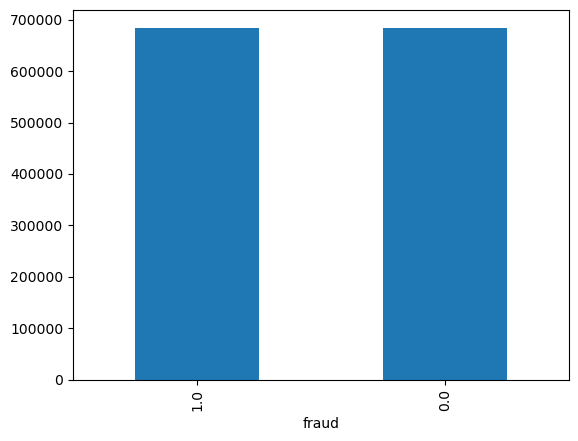

In [30]:
true_plt = train_over["fraud"].value_counts()
true_plt.plot(kind="bar")
plt.show()

In [31]:
features = df_fraud.drop(columns = ["fraud"])
target = df_fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
log_reg = LogisticRegression()

In [34]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
log_reg.score(X_test_scaled, y_test)

0.95858

In [36]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228040
         1.0       0.89      0.60      0.72     21960

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [37]:
# 4. Overall accuracy remains high (96%), meaning the model is still performing well.
# Precision for Fraud (Class 1) improved slightly (89%), indicating better fraud identification.
# Recall for Fraud (Class 1) stayed the same (60%), meaning the model still misses 40% of actual fraud cases.
# Macro Avg Recall (80%) improved compared to the imbalanced version (previously lower).

In [38]:
# 5. Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [39]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.395390,-0.184734,-0.420130,-2.729894,1.362479,-0.334342,0.732750,0.0
1,-0.304603,-0.175044,-0.551330,0.366315,1.362479,-0.334342,-1.364721,0.0
2,-0.375431,-0.157300,0.093240,0.366315,1.362479,2.990947,-1.364721,0.0
3,0.836263,-0.176509,-0.125504,0.366315,1.362479,-0.334342,0.732750,0.0
4,-0.316408,-0.141113,1.575523,0.366315,-0.733956,-0.334342,0.732750,1.0
...,...,...,...,...,...,...,...,...
749995,-0.396562,-0.180834,-0.046273,-2.729894,-0.733956,-0.334342,0.732750,0.0
749996,2.252660,-0.163092,-0.434877,0.366315,-0.733956,-0.334342,0.732750,1.0
749997,0.161921,-0.172064,0.583416,0.366315,-0.733956,-0.334342,0.732750,0.0
749998,-0.350678,-0.172884,1.375443,0.366315,-0.733956,-0.334342,0.732750,1.0


In [40]:
false_undersampled = resample(false, 
                                    replace=False, 
                                    n_samples = len(true),
                                    random_state=0)
false_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
65811,-0.396282,-0.071861,0.044365,-2.729894,-0.733956,-0.334342,0.732750,0.0
453060,-0.376204,-0.171908,-0.296097,0.366315,1.362479,-0.334342,0.732750,0.0
585404,-0.023262,-0.173004,-0.032788,0.366315,-0.733956,-0.334342,-1.364721,0.0
30476,-0.361579,-0.003253,-0.457688,0.366315,1.362479,2.990947,0.732750,0.0
412710,-0.365198,-0.092372,1.173573,0.366315,-0.733956,-0.334342,-1.364721,0.0
...,...,...,...,...,...,...,...,...
115042,0.108672,-0.089183,-0.556125,0.366315,-0.733956,-0.334342,0.732750,0.0
384786,-0.312442,-0.131235,-0.167507,0.366315,-0.733956,-0.334342,-1.364721,0.0
538385,-0.395712,-0.157320,0.208297,-2.729894,1.362479,-0.334342,0.732750,0.0
31557,-0.386147,-0.175377,-0.610827,-2.729894,-0.733956,-0.334342,-1.364721,0.0


In [41]:
train_under = pd.concat([false_undersampled, true])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
65811,-0.396282,-0.071861,0.044365,-2.729894,-0.733956,-0.334342,0.732750,0.0
453060,-0.376204,-0.171908,-0.296097,0.366315,1.362479,-0.334342,0.732750,0.0
585404,-0.023262,-0.173004,-0.032788,0.366315,-0.733956,-0.334342,-1.364721,0.0
30476,-0.361579,-0.003253,-0.457688,0.366315,1.362479,2.990947,0.732750,0.0
412710,-0.365198,-0.092372,1.173573,0.366315,-0.733956,-0.334342,-1.364721,0.0
...,...,...,...,...,...,...,...,...
749935,-0.135034,0.237980,6.464254,0.366315,-0.733956,-0.334342,0.732750,1.0
749960,1.586005,0.189412,0.210184,0.366315,-0.733956,-0.334342,0.732750,1.0
749979,0.020862,0.184210,1.683532,0.366315,1.362479,-0.334342,0.732750,1.0
749996,2.252660,-0.163092,-0.434877,0.366315,-0.733956,-0.334342,0.732750,1.0


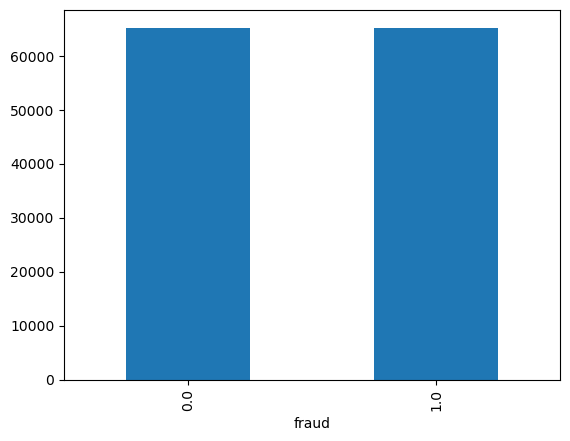

In [42]:
true_plt = train_under["fraud"].value_counts()
true_plt.plot(kind="bar")
plt.show()

In [43]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [45]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\aican\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228040
         1.0       0.58      0.95      0.72     21960

    accuracy                           0.94    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.94      0.94    250000



In [46]:
# Accuracy dropped slightly (93%) compared to oversampling (96%).
# Precision for Fraud (Class 1) decreased (57%), meaning more false positives (incorrect fraud predictions).
# Recall for Fraud (Class 1) improved significantly (95%), meaning the model detects most actual fraud cases.
# Macro Avg Recall (94%) increased compared to oversampling (80%).

# If recall is more important, this model is the most useful.

In [47]:
# 6. Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [48]:
# If recall is more important, this model is the most useful.

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [51]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [52]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [53]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228040
         1.0       0.58      0.95      0.72     21960

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [54]:
# Create a df after SMOTE
train_smote = pd.DataFrame(X_train_sm, columns=X_train.columns)
train_smote["fraud"] = y_train_sm.values

In [55]:
# Count fraud after SMOTE
smote_plt = train_smote["fraud"].value_counts()

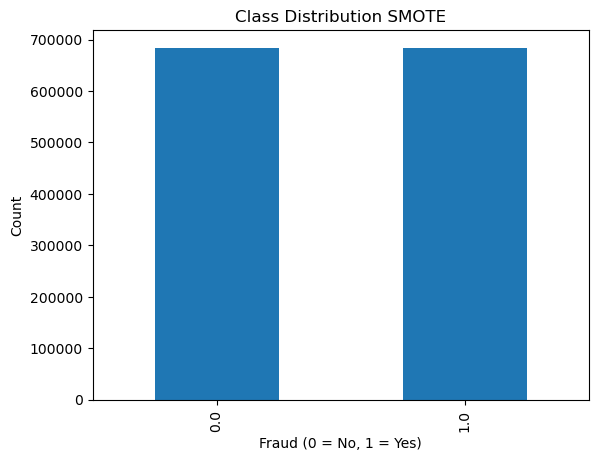

In [56]:
smote_plt.plot(kind="bar")
plt.title("Class Distribution SMOTE")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [57]:
# Overall Accuracy (93%). Slightly lower than oversampling but still strong.
# Recall for Fraud (Class 1) increased significantly (95%).
# Precision for Fraud (Class 1) remains low (57%, more false positives.
# Macro Avg Recall (94%) is higher than oversampling.

# If recall is more important, this model is the most useful, together with undersample (recall 95 % in both).

In [58]:
# Continue in the lab-imbalance notebook and add grid search.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [61]:
# Normalizer

In [62]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [63]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [64]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [65]:
# Grid Search

In [66]:
grid = {"n_neighbors": [3, 6, 9, 12, 15, 18]}

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
model = GridSearchCV(estimator = knn, param_grid = grid, cv=5)

In [ ]:
model.fit(X_train_norm, y_train)

In [ ]:
model = GridSearchCV(estimator=knn, param_grid=grid, cv=5, verbose=2)

In [ ]:
X_train_norm.info()

In [ ]:
y_train.dtype

In [ ]:
features = df_fraud.drop(columns=['cl_fraud'])
target = df_fraud['cl_fraud']

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
knn.fit(X_train_norm, y_train)
knn.score(X_test_norm, y_test)

In [ ]:
grid = {"max_depth": [3, 6, 9, 12, 15, 18]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = GridSearchCV(estimator = dt, param_grid = grid, cv=5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
# After training, we check what are the best values for the hyperparameters that we have tested.

In [ ]:
model.best_params_

In [ ]:
# You can retrieve the best model with the best parameters when accessing best_estimator_ attribute.

In [ ]:
best_model = model.best_estimator_

In [ ]:
# Evaluate our model

In [ ]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))